# Impulsive Noise Removal Using PWL Filters

### Table of Contents
1. Overview of Problem
2. Generation of Test Data
3. Filter Model
4. Analysis & Conclusions

### Problem Overview
A very common source of noise in the generation and transmission of signals is in the form of impulsive noise. In images, impulsive noise manifests as discrete, isolated pixel variations that often appear random. Obviously, noise of this form decreases signal quality and so it is beneficial to identify and remove the impulsive noise from the received image.

Traditionally, impulsive noise removal consists of two steps:
1. Impulse Detection
2. Estimation of Correct Value

Firstly, we identify the pixels that are affected by impulsive noise. Next, we estimate the value of that pixel prior to the addition of the noise. Our paper provides a filter model that can intuitively detect the impulsive noise and also a method of estimation for the corrupted pixels.

### Generation of Test Data
To replicate the results of our paper, we use commonly recognizable 256 x 256 pixel, grayscale images to illustrate the visual performance of the algorithm.

### Filter Model
To perform the impulsive noise detection and correct the noisy image, we follow the filter model described by our publication. We first recognize that an image that is corrupted with impulsive noise appears as:
$$ x_{i,j} = 
  \begin{cases}
    s_{i,j}, & 1 - p,\\
    s_{i,j} + i_{i,j}, & p,
  \end{cases}
$$

Where $s_{i,j}$ is the original image signal, $i_{i,j}$ is the impulsive noise and $p$ is the probability that a pixel is corrupted by noise. Now, we see that $x_{i,j}$ is a piecewise-linear (PWL) function. To detect the presence of an impulse on a given pixel, we compare the value of that pixel, $x_{i,j}$ with the mean value of pixels in that region, $m_{i,j}$. If we find that $x_{i,j}$ is sufficiently different from $m_{i,j}$, *i.e. $x_{i,j} > m_{i,j} + \beta$ or $x_{i,j} < m_{i,j} - \beta$*

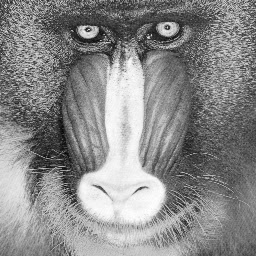

In [49]:
import numpy as np
import sys
from PIL import Image

image = Image.open('images/pic3.jpg')
image.show()
data = np.asarray(image)

To introduce impulsive noise to the image by randomly adding noise to pixels with a probability $p$. To allow for both positive and negative impulsive noise, we wrap around the resulting RBG value.  

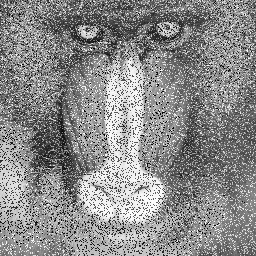

In [50]:
def apply_impulsive_noise(image_data: np.ndarray, amplitude, probability) -> np.ndarray:
  """
  Apply impulsive noise to image data
  """
  for i in range(len(image_data)):
    for j in range(len(image_data[0])):
      if (np.random.random() < probability):
          image_data[i][j] = (image_data[i][j] + amplitude) % 255
  return image_data

noisy_data = apply_impulsive_noise(data, 100, 0.2)
noisy_image = Image.fromarray(noisy_data)
noisy_image.show()

Next, we can calculate the mean value for each pixel within a 3x3 window. For pixels on the edges, we only take the mean of the pixels within the image. Then, for some central pixel, we will be taking the mean over 9 different grayscale values but for the corner pixels, we will only be averaging over 4 pixels.

In [51]:

def get_mean(x: np.ndarray, i, j):
  """
  Calculate mean of pixel accounting for boundaries
  """
  mean = 0
  count = 1
  if i > 0 and j > 0:
    mean += x[i-1][j-1]
    count += 1
  if i > 0:
    mean += x[i-1][j]
    count += 1
  if i > 0 and j < len(x[0]) - 1:
    mean += x[i-1][j+1]
    count += 1
  if i < len(x) - 1 and j < len(x[0]) - 1:
    mean += x[i+1][j+1]
    count += 1
  if i < len(x) - 1:
    mean += x[i+1][j]
    count += 1
  if i < len(x) - 1 and j > 0:
    mean += x[i+1][j-1]
    count += 1
  if j < len(x[0]) - 1:
    mean += x[i][j+1]
    count += 1
  if j > 0:
    mean += x[i][j-1]
    count += 1
  mean += x[i][j]
  mean /= count
  return mean
